In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load and Explore Dataset

In [2]:
# Load dataset
df = pd.read_csv(f'../dataset.csv')
# View the first 10 rows
df.head(10)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0,1.0,1,15.0,1.0,0.0,0.0,0,1,...,1,0.0,5.0,10.0,20.0,0.0,0,11,4.0,5.0
1,2.0,1,0.0,1,28.0,0.0,0.0,1.0,0,1,...,1,0.0,2.0,0.0,0.0,0.0,0,11,4.0,3.0
2,2.0,1,1.0,1,33.0,0.0,0.0,0.0,1,1,...,1,0.0,2.0,10.0,0.0,0.0,0,9,4.0,7.0
3,2.0,0,1.0,1,29.0,0.0,1.0,1.0,1,1,...,1,0.0,5.0,0.0,30.0,1.0,1,12,3.0,4.0
4,0.0,0,0.0,1,24.0,1.0,0.0,0.0,0,0,...,1,0.0,3.0,0.0,0.0,1.0,1,13,5.0,6.0
5,0.0,1,0.0,1,40.0,1.0,0.0,0.0,1,1,...,1,0.0,3.0,5.0,25.0,1.0,0,10,4.0,8.0
6,0.0,1,1.0,1,27.0,1.0,0.0,0.0,0,0,...,1,0.0,4.0,25.0,0.0,0.0,0,10,5.0,3.0
7,2.0,0,0.0,1,24.0,0.0,0.0,1.0,0,0,...,1,0.0,4.0,0.0,0.0,0.0,1,12,6.0,7.0
8,0.0,1,1.0,1,30.0,0.0,0.0,0.0,0,1,...,1,0.0,2.0,0.0,0.0,0.0,0,7,4.0,6.0
9,0.0,1,1.0,1,36.0,1.0,0.0,0.0,0,0,...,1,0.0,4.0,0.0,0.0,0.0,1,10,4.0,8.0


In [3]:
# Check if the dataset has null values
df.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

=> The dataset doesn't contain null values.

In [4]:
# Check the dataset information, including the number of columns, rows, and data types for each column
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236378 entries, 0 to 236377
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          236378 non-null  float64
 1   HighBP                236378 non-null  int64  
 2   HighChol              236378 non-null  float64
 3   CholCheck             236378 non-null  int64  
 4   BMI                   236378 non-null  float64
 5   Smoker                236378 non-null  float64
 6   Stroke                236378 non-null  float64
 7   HeartDiseaseorAttack  236378 non-null  float64
 8   PhysActivity          236378 non-null  int64  
 9   Fruits                236378 non-null  int64  
 10  Veggies               236378 non-null  int64  
 11  HvyAlcoholConsump     236378 non-null  int64  
 12  AnyHealthcare         236378 non-null  int64  
 13  NoDocbcCost           236378 non-null  float64
 14  GenHlth               236378 non-null  float64
 15  

=> We have 22 columns (features) and 236,378 rows. The column types are float and int, so encoding is not required for modeling.

In [5]:
# Check for duplicate rows
int(df.duplicated().sum())

12828

=> There are 12,828 duplicate rows that need to be removed to ensure data integrity, avoid bias in the models, and optimize the training process.

In [6]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)
int(df.duplicated().sum())

0

=> Duplicates have been successfully removed. The dataset is now clean and ready for further processing.

In [7]:
# Display dataset description
df = df.reset_index() # Reset the dataset indexes after rempving the duplicates
df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,223550.0,116513.873281,68355.829150,0.0,57029.25,115687.5,175408.5,236377.0
Diabetes_012,223550.0,0.323878,0.719551,0.0,0.00,0.0,0.0,2.0
HighBP,223550.0,0.431626,0.495304,0.0,0.00,0.0,1.0,1.0
HighChol,223550.0,0.410946,0.492007,0.0,0.00,0.0,1.0,1.0
CholCheck,223550.0,0.961503,0.192393,0.0,1.00,1.0,1.0,1.0
BMI,223550.0,29.132208,6.643441,12.0,25.00,28.0,32.0,99.0
Smoker,223550.0,0.425900,0.494480,0.0,0.00,0.0,1.0,1.0
Stroke,223550.0,0.041118,0.198564,0.0,0.00,0.0,0.0,1.0
HeartDiseaseorAttack,223550.0,0.091080,0.287724,0.0,0.00,0.0,0.0,1.0
PhysActivity,223550.0,0.767135,0.422658,0.0,1.00,1.0,1.0,1.0


=> From the description, we can observe that all the columns are categorical except the BMI column, which is continuous. This distinction will guide the adoption of appropriate preprocessing techniques and model training strategies. \
=> This result also indicates that it's better to transform all the categorical columns from float to int for several reasons, such as memory efficiency, improved model performance, and precision issues.

In [8]:
# Transform categorical columns from float to int
categorical_columns = list(df.columns)
categorical_columns.remove("BMI") # Get all columns except BMI
df[categorical_columns] = df[categorical_columns].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223550 entries, 0 to 223549
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   index                 223550 non-null  int64  
 1   Diabetes_012          223550 non-null  int64  
 2   HighBP                223550 non-null  int64  
 3   HighChol              223550 non-null  int64  
 4   CholCheck             223550 non-null  int64  
 5   BMI                   223550 non-null  float64
 6   Smoker                223550 non-null  int64  
 7   Stroke                223550 non-null  int64  
 8   HeartDiseaseorAttack  223550 non-null  int64  
 9   PhysActivity          223550 non-null  int64  
 10  Fruits                223550 non-null  int64  
 11  Veggies               223550 non-null  int64  
 12  HvyAlcoholConsump     223550 non-null  int64  
 13  AnyHealthcare         223550 non-null  int64  
 14  NoDocbcCost           223550 non-null  int64  
 15  

=> Now all the categorical columns are of type int, except for the BMI column.

# Feature engineering 

Now that we have explored the dataset, the results indicate the need for a feature engineering phase. \
The first feature we can create is a categorical version of the BMI column, as follows:

In [9]:
def BMI_category(BMI):
    # Example mapping: Group common crime types into broader categories
    if BMI < 18.5 :
        return 0 # Underweight
    elif BMI >= 18.5 and BMI <= 24.9:
        return 1 # Normal weight
    elif BMI >= 25 and BMI <= 29.9 :
        return 2 # Overweight
    elif BMI >= 30 and BMI <= 34.9 :
        return 3 # Obesity Class 1
    elif BMI >= 35 and BMI <= 39.9 :
        return 4 # Obesity Class 2
    else :
        return 5 # Obesity Class 3
df['BMI Category'] = df['BMI'].apply(BMI_category)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223550 entries, 0 to 223549
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   index                 223550 non-null  int64  
 1   Diabetes_012          223550 non-null  int64  
 2   HighBP                223550 non-null  int64  
 3   HighChol              223550 non-null  int64  
 4   CholCheck             223550 non-null  int64  
 5   BMI                   223550 non-null  float64
 6   Smoker                223550 non-null  int64  
 7   Stroke                223550 non-null  int64  
 8   HeartDiseaseorAttack  223550 non-null  int64  
 9   PhysActivity          223550 non-null  int64  
 10  Fruits                223550 non-null  int64  
 11  Veggies               223550 non-null  int64  
 12  HvyAlcoholConsump     223550 non-null  int64  
 13  AnyHealthcare         223550 non-null  int64  
 14  NoDocbcCost           223550 non-null  int64  
 15  

=> The column BMI Category was created successfully and is of type int.

# Visualization

## Distribution of the target (Diabetes)

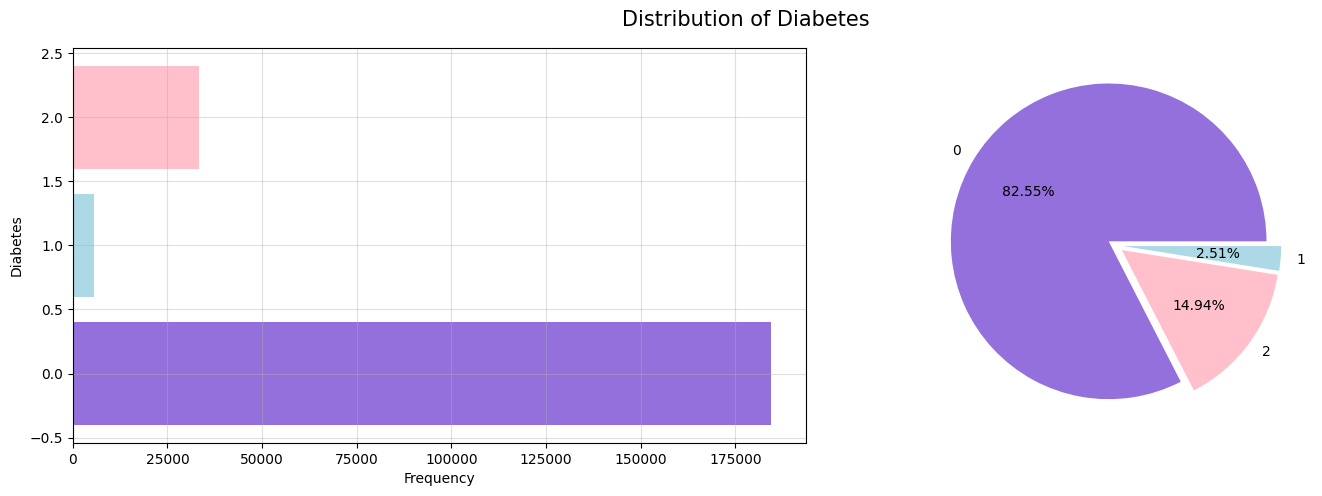

In [11]:
types = df['Diabetes_012'].value_counts()
colors = ['mediumpurple', 'pink' , "lightblue"]

# Create a two-subplot layout
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Bar chart on the first subplot
ax1.barh(y=types.index, width=types.values, color=colors)
ax1.set_xlabel('Frequency')
ax1.set_ylabel('Diabetes')
ax1.grid(alpha=0.4)

# Pie chart on the second subplot
ax2.pie(types.values, labels=types.index, explode=([0.05] * len(types.index)), colors=colors, autopct='%.2f%%')

# Configure the overall layout
fig.suptitle('Distribution of Diabetes', fontsize=15)
plt.tight_layout(pad=1)
plt.show()

=> The target is very imbalanced. Data augmentation should be applied to balance the categories before the modeling phase.

## Distribution of Diabetes per feature

In [12]:
# Define the function responsible for plotting the distribution of the target per feature
def plot_target_distribution_per_feature(feature):
    # Create a crosstab table to see the distribution of diabetes across the feature
    diabetes_bp_crosstab = pd.crosstab(df[feature], df["Diabetes_012"], margins=False)

    # 1. Bar chart (stacked)
    plt.figure(figsize=(8, 6))
    diabetes_bp_crosstab.plot(kind="bar", stacked=True, color=colors)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(f"Distribution of Diabetes By {feature}")
    plt.legend(title="Diabetes", labels=["No Diabetes", "Prediabetes", "Diabetes"])
    plt.show()

### Distribution of Diabetes By HighBP

<Figure size 800x600 with 0 Axes>

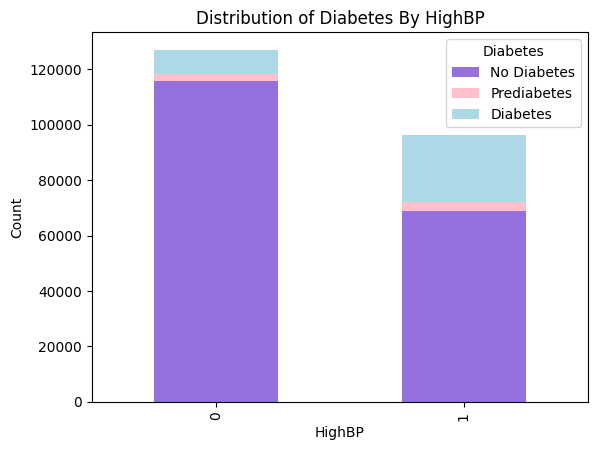

In [13]:
plot_target_distribution_per_feature("HighBP")

### Distribution of Diabetes By PhysActivity

<Figure size 800x600 with 0 Axes>

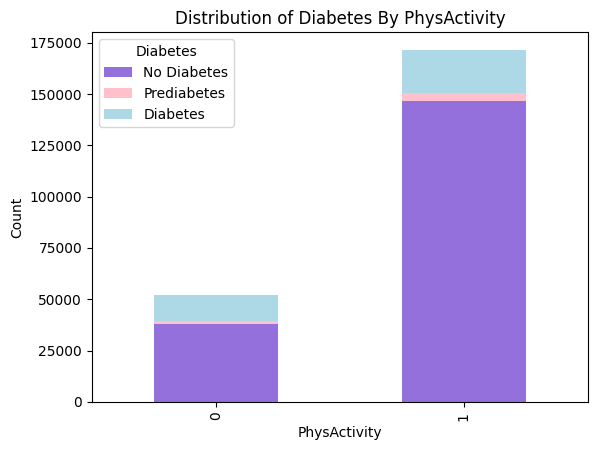

In [14]:
plot_target_distribution_per_feature("PhysActivity")

### Distribution of Diabetes By Smoker

<Figure size 800x600 with 0 Axes>

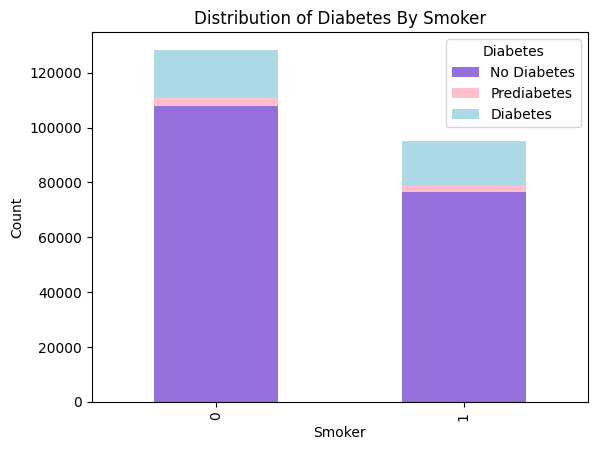

In [15]:
plot_target_distribution_per_feature("Smoker")

### Distribution of Diabetes By Age

<Figure size 800x600 with 0 Axes>

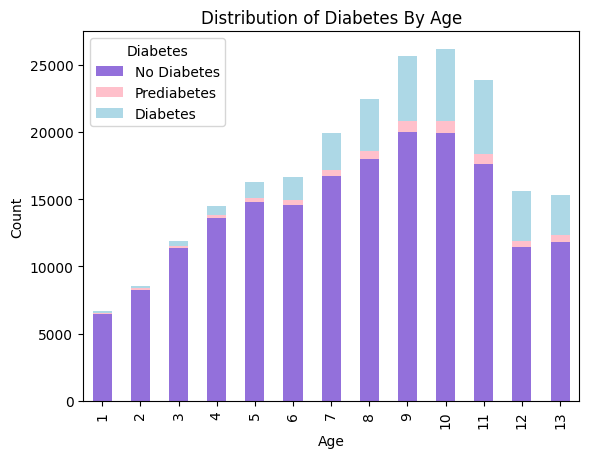

In [16]:
plot_target_distribution_per_feature("Age")

### Distribution of Diabetes By HeartDiseaseorAttack

<Figure size 800x600 with 0 Axes>

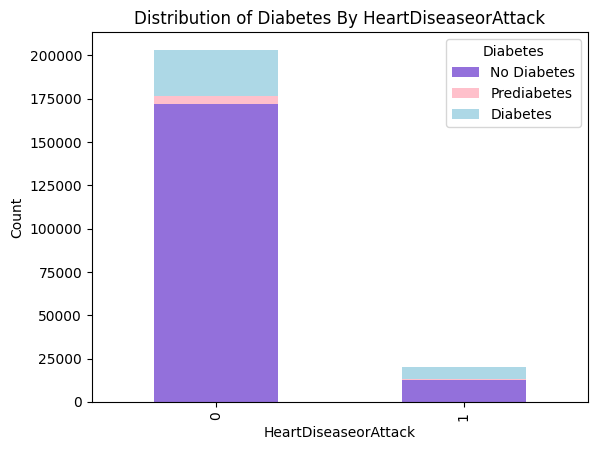

In [17]:
plot_target_distribution_per_feature("HeartDiseaseorAttack")

### Distribution of Diabetes By HvyAlcoholConsump

<Figure size 800x600 with 0 Axes>

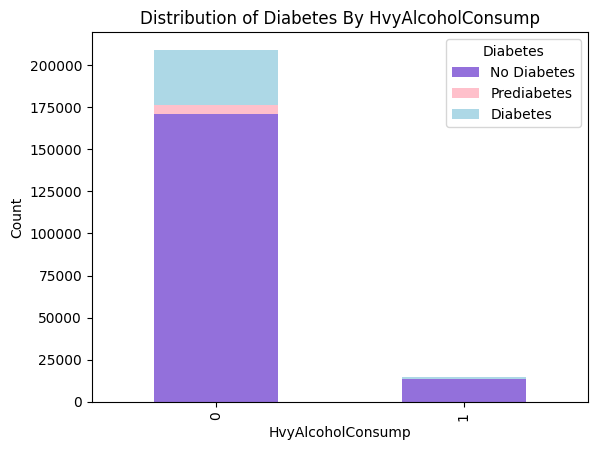

In [18]:
plot_target_distribution_per_feature("HvyAlcoholConsump")

### Distribution of Diabetes By HighChol

<Figure size 800x600 with 0 Axes>

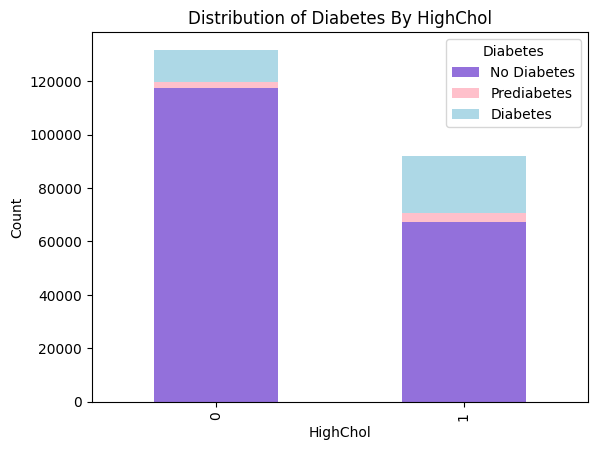

In [19]:
plot_target_distribution_per_feature("HighChol")

# Standardization
In this phase, we need to scale the continuous column BMI. This is the first step to select relevant columns after analyzing their correlation with the target.

In [20]:
# Instantiate the scaler
scaler = StandardScaler()

# Standardize the BMI feature
X_scaled = scaler.fit_transform(df[['BMI']])

# Replace the original BMI column with the standardized one
df['BMI'] = X_scaled

df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,223550.0,1.165139e+05,68355.829150,0.000000,57029.250000,115687.500000,175408.500000,236377.000000
Diabetes_012,223550.0,3.238783e-01,0.719551,0.000000,0.000000,0.000000,0.000000,2.000000
HighBP,223550.0,4.316260e-01,0.495304,0.000000,0.000000,0.000000,1.000000,1.000000
HighChol,223550.0,4.109461e-01,0.492007,0.000000,0.000000,0.000000,1.000000,1.000000
CholCheck,223550.0,9.615030e-01,0.192393,0.000000,1.000000,1.000000,1.000000,1.000000
BMI,223550.0,1.922327e-16,1.000002,-2.578821,-0.621999,-0.170425,0.431674,10.516832
Smoker,223550.0,4.259002e-01,0.494480,0.000000,0.000000,0.000000,1.000000,1.000000
Stroke,223550.0,4.111832e-02,0.198564,0.000000,0.000000,0.000000,0.000000,1.000000
HeartDiseaseorAttack,223550.0,9.108030e-02,0.287724,0.000000,0.000000,0.000000,0.000000,1.000000
PhysActivity,223550.0,7.671349e-01,0.422658,0.000000,1.000000,1.000000,1.000000,1.000000


=> The column BMI was standardized successfully. \
Now, let's observe the correlation between the features and the target column.

In [21]:
# Calculate correlation with target for numerical features
correlations = df.corrwith(df['Diabetes_012'])
correlations

index                   0.018503
Diabetes_012            1.000000
HighBP                  0.263919
HighChol                0.204422
CholCheck               0.076979
BMI                     0.204167
Smoker                  0.048561
Stroke                  0.098964
HeartDiseaseorAttack    0.172779
PhysActivity           -0.142070
Fruits                 -0.019883
Veggies                -0.039099
HvyAlcoholConsump      -0.064860
AnyHealthcare           0.031030
NoDocbcCost             0.010517
GenHlth                 0.278590
MentHlth                0.028714
PhysHlth                0.155713
DiffWalk                0.209250
Sex                     0.036045
Age                     0.201837
Education              -0.095980
Income                 -0.148385
BMI Category            0.202646
dtype: float64

Features with higher absolute correlations are more strongly related to the target and may be prioritized in modeling. Features with low correlations contribute less predictive power. 


We will try 4 FS methods:
1. Manual selection.
2. Use PCA.
3. Use wrapper method.
4. Hybrid method (PCA + wrapper).

In [22]:
# Save the preprocessed dataset before feature selection
df.to_csv("./processed_datasets/dataset_preprocessed.csv", index=False)